In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline

In [3]:
df = pd.read_csv("data/EPL/history.csv")

In [4]:
df.head()

,div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [200]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1718 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/E0.csv")
epl_1718 = epl_1718.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})

epl = pd.concat([epl_1617, epl_1718])
epl.head()

,Div,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [6]:
epl_1819 = pd.read_csv("data/EPL/fixtures.csv")
epl_1819.head()

,DIVISION,DATE,TIME,FIXTURE,HOME TEAM,AWAY TEAM
0,EPL,8/10/2018,20:00,Manchester United V Leicester City,Manchester United,Leicester City
1,EPL,8/11/2018,12:30,Newcastle United V Tottenham Hotspur,Newcastle United,Tottenham Hotspur
2,EPL,8/11/2018,15:00,Bournemouth V Cardiff City,Bournemouth,Cardiff City
3,EPL,8/11/2018,15:00,Fulham V Crystal Palace,Fulham,Crystal Palace
4,EPL,8/11/2018,15:00,Huddersfield Town V Chelsea,Huddersfield Town,Chelsea


In [7]:
# Goals scored by home and away
epl.agg({'HomeGoals':np.mean, 'AwayGoals':np.mean})

HomeGoals    1.564474
AwayGoals    1.175000
dtype: float64

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


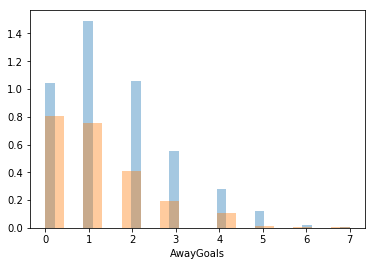

In [8]:
for col in ['HomeGoals','AwayGoals']:
    sns.distplot(epl[col], kde=False, norm_hist=True)

In [15]:
# Probabilities of draw, home win/away win by single goal
draw = sp.stats.skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])
home_win = sp.stats.skellam.pmf(1.0,  epl_1617.mean()[0],  epl_1617.mean()[1])
away_win = sp.stats.skellam.pmf(-1.0,  epl_1617.mean()[0],  epl_1617.mean()[1])
print("*** Draw:\t\t{draw}\n*** Home win by 1:\t{home}\n*** Away win by 1:\t{away}".format(draw=draw, home=home_win, away=away_win))

*** Draw:		0.2472623146527037
*** Home win by 1:	0.2255825966367541
*** Away win by 1:	0.16983730916473913


In [24]:
goal_diff = np.arange(-8,8,1)
win_pdf = [sp.stats.skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in goal_diff]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


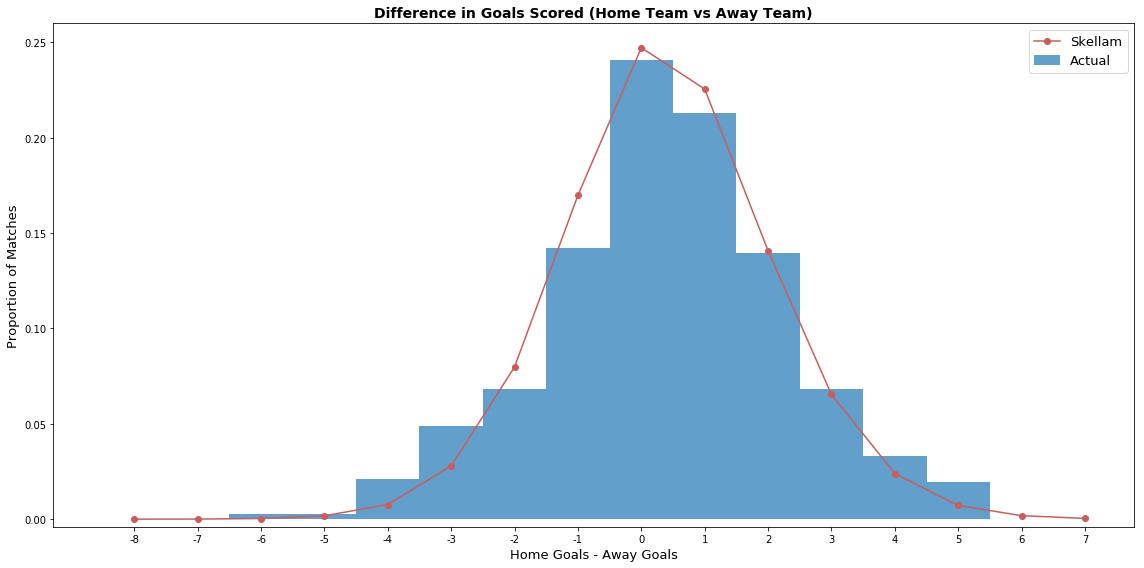

In [25]:
fig = plt.figure(figsize=(16,8))
plt.hist(epl[['HomeGoals']].values - epl[['AwayGoals']].values, goal_diff, 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in goal_diff], win_pdf, linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in goal_diff],[i for i in goal_diff])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

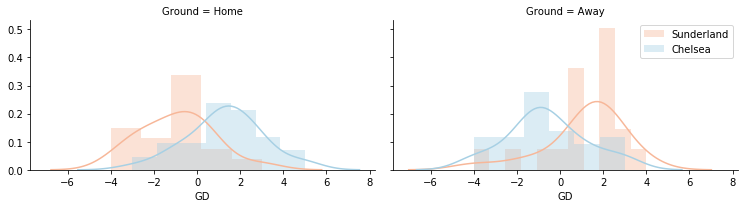

In [91]:
df2 = epl[(epl['HomeTeam']=='Chelsea') | (epl['AwayTeam']=='Chelsea') | (epl['HomeTeam']=='Sunderland') | (epl['AwayTeam']=='Sunderland')]
df2.loc[(df2['HomeTeam']=='Chelsea') | (df2['AwayTeam']=='Chelsea'),'Team']='Chelsea'
df2.loc[(df2['HomeTeam']=='Chelsea'),'Ground']='Home'
df2.loc[(df2['AwayTeam']=='Chelsea'),'Ground']='Away'
df2.loc[(df2['HomeTeam']=='Sunderland') | (df2['AwayTeam']=='Sunderland'),'Team']='Sunderland'
df2.loc[(df2['HomeTeam']=='Sunderland'),'Ground']='Home'
df2.loc[(df2['AwayTeam']=='Sunderland'),'Ground']='Away'
df2['GD']=(df2[['HomeGoals']].values - df2[['AwayGoals']].values)


# with sns.axes_style('white'):
#     g = sns.distplot(df2['GD'], row="Ground", hue='Team', palette=sns.color_palette("RdBu", n_colors=2))

grid = sns.FacetGrid(df2, col="Ground", col_order=['Home','Away'], hue='Team', legend_out=True, aspect=1.75,
                     margin_titles=True, despine=True, palette=sns.color_palette("RdBu", n_colors=2))
grid.map(sns.distplot, 'GD')
plt.legend()


In [102]:
df2_melt = df2.melt(id_vars=['Team'], value_vars=['HomeGoals','AwayGoals'], var_name='Ground', value_name='Goals')
df2_melt.head()


,Team,Ground,Goals
0,Sunderland,HomeGoals,2
1,Chelsea,HomeGoals,2
2,Chelsea,HomeGoals,1
3,Sunderland,HomeGoals,1
4,Chelsea,HomeGoals,3


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


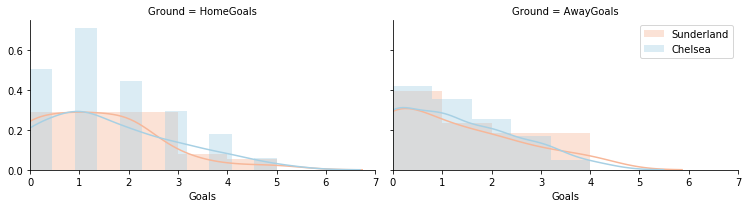

In [108]:
grid2 = sns.FacetGrid(df2_melt, col="Ground", col_order=['HomeGoals','AwayGoals'], hue='Team', legend_out=True, 
                      aspect=1.75, margin_titles=True, despine=True, palette=sns.color_palette("RdBu", n_colors=2), xlim=(0,7))
grid2.map(sns.distplot, 'Goals')
plt.legend()

In [121]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

In [125]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 1520
Model:                            GLM   Df Residuals:                     1474
Model Family:                 Poisson   Df Model:                           45
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.6
Date:                Sat, 25 Aug 2018   Deviance:                       1626.1
Time:                        14:02:04   Pearson chi2:                 1.41e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4651      0.135      3.435      0.001       0.200       0.730
team[T.Bournemouth]           -0.3966      0.129     -3.070      0.002      -0.650      -0.143
team[T.Brighton]              -0.7712      0.190     -4.056      0.000      -1.144      -0.399
team[T.Burnley]               -0.7022      0.141     -4.964      0.000      -0.979      -0.425
team[T.Chelsea]               -0.0393      0.116     -0.339      0.735      -0.267       0.188
team[T.Crystal Palace]        -0.4531      0.131     -3.455      0.001      -0.710      -0.196
team[T.Everton]               -0.3514      0.127     -2.769      0.006      -0.600      -0.103
team[T.Huddersfield]          -0.9616      0.206     -4.667      0.000      -1.365      -0.558
team[T.Hull]                  -0.7043      0.184     -3.833      0.000      -1.064      -0.344
team[T.Leicester]             -0.3598      0.128     -2.818      0.005      -0.610      -0.110
team[T.Liverpool]              0.0628      0.113      0.554      0.580      -0.159       0.285
team[T.Man City]               0.1941      0.110      1.769      0.077      -0.021       0.409
team[T.Man United]            -0.2332      0.122     -1.913      0.056      -0.472       0.006
team[T.Middlesbrough]         -1.0468      0.209     -5.004      0.000      -1.457      -0.637
team[T.Newcastle]             -0.6408      0.180     -3.561      0.000      -0.994      -0.288
team[T.Southampton]           -0.6579      0.140     -4.712      0.000      -0.932      -0.384
team[T.Stoke]                 -0.6738      0.141     -4.784      0.000      -0.950      -0.398
team[T.Sunderland]            -0.9595      0.203     -4.726      0.000      -1.357      -0.562
team[T.Swansea]               -0.7132      0.143     -4.996      0.000      -0.993      -0.433
team[T.Tottenham]              0.0411      0.114      0.361      0.718      -0.182       0.264
team[T.Watford]               -0.5694      0.136     -4.177      0.000      -0.837      -0.302
team[T.West Brom]             -0.7091      0.142     -4.991      0.000      -0.988      -0.431
team[T.West Ham]              -0.4460      0.131     -3.400      0.001      -0.703      -0.189
opponent[T.Bournemouth]        0.2729      0.136      2.011      0.044       0.007       0.539
opponent[T.Brighton]           0.0818      0.171      0.479      0.632      -0.253       0.416
opponent[T.Burnley]           -0.0493      0.146     -0.338      0.735      -0.335       0.236
opponent[T.Chelsea]           -0.2942      0.157     -1.872      0.061      -0.602       0.014
opponent[T.Crystal Palace]     0.1887      0.138      1.367      0.172      -0.082       0.459
opponent[T.Everton]            0.0482      0.143      0.338      0.736      -0.232       0.328
opponent[T.Huddersfield]       0.1472      0.167      0.882      0.378      -0.180       0.474
opponent[T.Hull]           

In [126]:
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Arsenal',
                                       'home':1},index=[1]))

1    2.038263
dtype: float64

In [131]:
poisson_model.predict(pd.DataFrame(data={'team': 'Arsenal', 'opponent': 'Chelsea',
                                       'home':0},index=[1]))

1    1.186388
dtype: float64

In [134]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[sp.stats.poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [158]:
simulate_match(poisson_model, 'Chelsea', 'Arsenal', max_goals=3)

array([[0.03976966, 0.04718225, 0.02798823, 0.0110683 ],
       [0.08106103, 0.09616983, 0.05704736, 0.0225601 ],
       [0.08261185, 0.0980097 , 0.05813876, 0.02299171],
       [0.05612822, 0.06658985, 0.0395007 , 0.01562105]])

In [177]:
chel_ars = simulate_match(poisson_model, "Arsenal", "West Ham", max_goals=10)
print("Arsenal v West Ham\nArsenal win:\t{cw}\nDraw:\t\t{d}\nWest Ham win:\t{aw}".format(
    cw=np.sum(np.tril(chel_ars, -1)),
    d=np.sum(np.diag(chel_sun)),
    aw=np.sum(np.triu(chel_ars, 1))
))

Arsenal v West Ham
Arsenal win:	0.752659577788586
Draw:		0.21230468896266444
West Ham win:	0.10554513744438693


In [201]:
# epl_halves = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_halves = epl[['HomeGoals', 'AwayGoals', 'HTHG', 'HTAG']]
epl_halves['FHgoals'] = epl_halves['HTHG'] + epl_halves['HTAG']
epl_halves['SHgoals'] = epl_halves['HomeGoals'] + epl_halves['AwayGoals'] - epl_halves['FHgoals']
epl_halves = epl_halves[['FHgoals', 'SHgoals']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [203]:
epl_halves.head()

,FHgoals,SHgoals
0,0,1
1,0,1
2,1,1
3,1,2
4,1,2


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


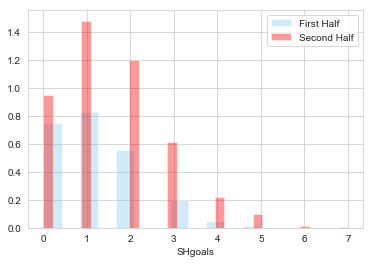

In [211]:
sns.distplot(epl_halves['FHgoals'], color="skyblue", hist=True, kde=False, norm_hist=True, label="First Half")
sns.distplot(epl_halves['SHgoals'], color="red", hist=True, kde=False, norm_hist=True, label="Second Half")
plt.legend()